In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import date, datetime

In [2]:
text = "WhatsApp Chat with CONVEXITY BLOCKCHAIN HUB.txt"
with open(text, encoding="utf8") as f:
    chats = f.read()


In [3]:
'''
def hash_num(match):
    for key in num_hash_dict.keys():
        if match.group() == key:
            hash_val = num_hash_dict[key]
            return hash_val
'''

'\ndef hash_num(match):\n    for key in num_hash_dict.keys():\n        if match.group() == key:\n            hash_val = num_hash_dict[key]\n            return hash_val\n'

In [4]:
'''
p = re.compile(r'\+\d{3} \d{3} \d{3} \d{4}')
nu_chats = p.sub(hash_num, chats)
nu_chats
'''

"\np = re.compile(r'\\+\\d{3} \\d{3} \\d{3} \\d{4}')\nnu_chats = p.sub(hash_num, chats)\nnu_chats\n"

In [5]:
pattern = "\d{2}\/\d{2}\/\d{4}, \d{2}:\d{2}"
matches = re.findall(pattern, chats)
matches[0:5]

['28/07/2021, 17:54',
 '28/05/2021, 09:21',
 '28/07/2021, 17:53',
 '28/07/2021, 17:56',
 '28/07/2021, 18:33']

\d{2}\/\d{2}\/\d{4}, \d{2}:\d{2} - (\+\d+ \d+[^:a-zA-Z]+)|\d{2}\/\d{2}\/\d{4}, \d{2}:\d{2} - (\+1 [^ ]+ [^ a-zA_Z:]+)

In [6]:
events_by_date = re.split(pattern, chats, maxsplit=0, flags=0)
#events_by_date[0:5]

In [7]:
# Check last 5 events
#events_by_date[-5:]

In [8]:
print(len(matches))
print(len(events_by_date))

10835
10836


In [9]:
events_by_date.pop(0)

''

In [10]:
# Confirm both matches and list are equal in length
print(len(matches))
print(len(events_by_date))

10835
10835


In [11]:
df = pd.DataFrame(events_by_date, columns=['events'])
df.head(1)

,events
0,- Messages and calls are end-to-end encrypted...


In [12]:
df['date_time'] = pd.DataFrame(matches)
df.head(1)

,events,date_time
0,- Messages and calls are end-to-end encrypted...,"28/07/2021, 17:54"


In [13]:
# Note the number of events captured in data
number_of_events = len(df)
number_of_events

10835

In [14]:
df['date'] = df['date_time'].str.extract('(\d{2}\/\d{2}\/\d{4}), \d{2}:\d{2}', expand=True)
df.head(1)

,events,date_time,date
0,- Messages and calls are end-to-end encrypted...,"28/07/2021, 17:54",28/07/2021


In [15]:
df['time'] = df['date_time'].str.extract('\d{2}\/\d{2}\/\d{4}, (\d{2}:\d{2})', expand=True)
df.head(1)

,events,date_time,date,time
0,- Messages and calls are end-to-end encrypted...,"28/07/2021, 17:54",28/07/2021,17:54


In [16]:
df.drop('date_time', axis=1, inplace=True)
df.head(1)

,events,date,time
0,- Messages and calls are end-to-end encrypted...,28/07/2021,17:54


In [17]:
df['date_'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.head(1)

,events,date,time,date_
0,- Messages and calls are end-to-end encrypted...,28/07/2021,17:54,2021-07-28


In [18]:
df['full_date'] = df['date_'].dt.strftime('%A %B %d, %Y')
df.head(1)

,events,date,time,date_,full_date
0,- Messages and calls are end-to-end encrypted...,28/07/2021,17:54,2021-07-28,"Wednesday July 28, 2021"


In [19]:
df['day'] = df['full_date'].str.extract('(\A\w+)', expand=True)
df['month'] = df['full_date'].str.extract('\A\w+ (\w+) \d{2}', expand=True)
df['date_num'] = df['full_date'].str.extract('\A\w+ \w+ (\d{2}), \d{4}', expand=True)
df['year'] = df['full_date'].str.extract('\A\w+ \w+ \d{2}, (\d{4})', expand=True)

df.head(1)

,events,date,time,date_,full_date,day,month,date_num,year
0,- Messages and calls are end-to-end encrypted...,28/07/2021,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021


In [20]:
df.drop('date', axis=1, inplace=True)
df.rename(columns={'date_': 'date'}, inplace=True)

df["date_num"] = df["date_num"].astype(str).astype(int)           # Convert date_num to string

df.head(1)

,events,time,date,full_date,day,month,date_num,year
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021


In [21]:
df['link_shared'] = df['events'].str.extract('https:\/\/([a-zA-Z.\/\d\-?=]*)', expand=True)
df.head(1)

,events,time,date,full_date,day,month,date_num,year,link_shared
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN


In [22]:
df.rename(columns={'events': 'event'}, inplace=True)

In [23]:
df['media_post'] = np.where(df["event"].str.contains('Media omitted'), 1, 0)
df.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0


In [24]:
df['member_exit'] = np.where(df["event"].str.contains('\d+ left\n'), 1, 0) # does str.contains take in regex.... omg
df.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,member_exit
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,0


In [25]:
df['new_member_added'] = np.where(df["event"].str.contains('\d+ added [^\n]+'), 1, 0)
df['new_member_num'] = df["event"].str.extract('\d+ added ([^\n]+)', expand=True)
df.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,member_exit,new_member_added,new_member_num
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,0,0,NaN


In [26]:
df['new_member_joined'] = np.where(df["event"].str.contains('\+\d+ [^\na-z]+joined'), 1, 0)
df['new_member_num'] = df["event"].str.extract('(\+\d+ [^\na-z]+)joined', expand=True)


In [27]:
df['msg_deleted'] = np.where(df["event"].str.contains('This message was deleted'), 1, 0)

In [28]:
# function to extract only words from each event in df
def stringer(string):
    p = re.compile("^|\s[a-zA-Z][a-zA-Z']*")     # (^|\s|\*)([a-zA-Z][a-zA-Z'?]*) or ^|\s|\*[a-zA-Z][a-zA-Z'?]*  
    s = p.findall(string)                        # to include question marks and words starting with *
    n_string = " ".join(s)
    return n_string

In [29]:
df['words'] = df['event'].apply(lambda row: stringer(row))
df.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,member_exit,new_member_added,new_member_num,new_member_joined,msg_deleted,words
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,0,0,NaN,0,0,Messages and calls are end encrypted N...


In [30]:
words_to_remove = ["https", "added you", "left", "omitted", "NaN", ]
df['words'] = np.where(df['words'].str.contains(r'\b(?:{})\b'.format('|'.join(words_to_remove))), '', df['words'])

df['words'] = np.where(df['event'].str.contains(r"joined using this group's invite link"), '', df['words'])


In [31]:
df['is_emoji_used'] = np.where(df["event"].str.contains('[\U00010000-\U0010ffff]', flags=re.UNICODE), 1, 0)

In [32]:
# revamp function to accept different regex patterns as input
def reg_matches_to_string(string, rgx):
    p = re.compile(rgx)
    s = p.findall(string) # output of p.findall is a list of strings
    n_string = " ".join(s)
    return n_string

In [33]:
reg = '([\U00010000-\U0010ffff])'

In [34]:
df['emoji'] = df['event'].apply(lambda row: reg_matches_to_string(row, reg))


In [35]:
df['is_group_settings_change'] = np.where(df["event"].str.contains("\+\d+ \d+ \d+ \d+ changed this group's settings"), 1, 0)

In [36]:
reg2 = "\+\d+ \d+ \d+ (\d+ changed this group's settings[^\n]+)"

In [37]:
df['group_settings_msg'] = df['event'].apply(lambda row: reg_matches_to_string(row, reg2))

In [38]:
df['is_phone_num_change'] = np.where(df["event"].str.contains("\+\d+\d+[^ ]+ changed to [^\n]+"), 1, 0)

In [39]:
reg3 = "(\+\d+ \d+ \d+ \d+) changed to [^\n]+"
reg4 = "\+\d+ \d+ \d+ \d+ changed to ([^\n]+)"

In [40]:
df['previous_num'] = df['event'].apply(lambda row: reg_matches_to_string(row, reg3))

In [41]:
df['new_num'] = df['event'].apply(lambda row: reg_matches_to_string(row, reg4))

In [42]:
reg5 = "\+\d+ \d+ \d+ \d+ removed (\+\d+[^\n]+)"
reg6 = "(\+\d+ \d+ \d+ \d+) removed \+\d+[^\n]+"

In [43]:
df['is_member_removed'] = np.where(df['event'].str.contains("\+\d+ \d+ \d+ \d+ removed \+\d+[^\n]+"), 1, 0)
df['member_removed'] = df['event'].apply(lambda row: reg_matches_to_string(row, reg5))

In [44]:
df['admin_num'] = df['event'].apply(lambda row: reg_matches_to_string(row, reg6))

In [45]:
reg7 = "(\+\d+ \d+ \d+ \d+) changed this group's settings[^\n]+"

In [46]:
df['admin_num2'] = df['event'].apply(lambda row: reg_matches_to_string(row, reg7))

In [47]:
# merge both admin_num columns
df.loc[df["admin_num"] == '', "admin_num"] = df["admin_num2"]

In [48]:
# df[['col1', 'col2']] # to pick any two columns in df

In [49]:
#df.iloc[2000:2050]

In [50]:
type(df['admin_num'][0])

str

In [51]:
# define custom fxn to replace \n
def replace_n_(rgx_list, text):
    new_text = text
    for rgx_match in rgx_list:
        new_text = re.sub(rgx_match, ' ', new_text)
    return new_text

In [52]:
# replace '\n' with blank space
n_ = ['\n']
df['words'] = df['words'].apply(lambda row: replace_n_(n_, row))

In [53]:
df.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,...,emoji,is_group_settings_change,group_settings_msg,is_phone_num_change,previous_num,new_num,is_member_removed,member_removed,admin_num,admin_num2
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,...,,0,,0,,,0,,,


In [54]:
df.iloc[0:5, 9:19]

,media_post,member_exit,new_member_added,new_member_num,new_member_joined,msg_deleted,words,is_emoji_used,emoji,is_group_settings_change
0,0,0,0,NaN,0,0,Messages and calls are end encrypted N...,0,,0
1,0,0,0,NaN,0,0,created group BLOCKCHAIN HUB,0,,0
2,0,0,1,NaN,0,0,added you,0,,0
3,0,0,0,NaN,0,0,,0,,0
4,0,1,0,NaN,0,0,,0,,0


In [55]:
def get_event_type(row):
    if 'http' in row['event']:
        val = 'chat msg includes link'
    elif row['media_post'] == 1:
        val = 'chat msg includes media'
    elif row['member_exit'] == 1:
        val = 'member left'
    elif row['new_member_added'] == 1:
        val = 'member added'
    elif row['new_member_joined'] == 1:
        val = 'member joined'
    elif row['msg_deleted'] == 1:
        val = 'member deleted msg'
    elif row['is_emoji_used'] == 1:
        val = 'chat msg includes emoji'
    elif row['is_group_settings_change'] == 1:
        val = 'admin changed group settings'
    elif row['is_phone_num_change'] == 1:
        val = 'member changed phone'
    elif row['is_member_removed'] == 1:
        val = 'member removed'
    else:
        val = 'chat msg txt only'
        
    return val

In [56]:
df['event_type'] = df.apply(lambda row: get_event_type(row), axis=1)
df.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,...,is_group_settings_change,group_settings_msg,is_phone_num_change,previous_num,new_num,is_member_removed,member_removed,admin_num,admin_num2,event_type
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,...,0,,0,,,0,,,,chat msg txt only


In [57]:
# df.iloc[6456:6459]

In [58]:
reg8 = "- (\+\d[^a-z:]+)"

In [59]:
df['num'] = df["event"].str.extract(reg8, expand=True)
df.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,...,group_settings_msg,is_phone_num_change,previous_num,new_num,is_member_removed,member_removed,admin_num,admin_num2,event_type,num
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,...,,0,,,0,,,,chat msg txt only,NaN


In [60]:
df['num'] = df['num'].str.strip()
df.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,...,group_settings_msg,is_phone_num_change,previous_num,new_num,is_member_removed,member_removed,admin_num,admin_num2,event_type,num
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,...,,0,,,0,,,,chat msg txt only,NaN


In [61]:
df['idc'] = df['num'].str.extract("(\+\d+)", expand= True)
df.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,...,is_phone_num_change,previous_num,new_num,is_member_removed,member_removed,admin_num,admin_num2,event_type,num,idc
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,...,0,,,0,,,,chat msg txt only,NaN,NaN


In [62]:
# How many unique countries
df['idc'].value_counts()

+234    10733
+1         21
+91        19
+233       17
+240       15
+44         5
Name: idc, dtype: int64

In [63]:
# How many unique phone numbers
df['num'].nunique()

253

In [64]:
# Find rows with missing number in idc column
df.loc[df['idc'].isna()]

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,...,is_phone_num_change,previous_num,new_num,is_member_removed,member_removed,admin_num,admin_num2,event_type,num,idc
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,...,0,,,0,,,,chat msg txt only,NaN,NaN
2273,- Fred Blockchain (Brave Browser): We look fo...,12:41,2021-09-10,"Friday September 10, 2021",Friday,September,10,2021,NaN,0,...,0,,,0,,,,chat msg includes emoji,NaN,NaN
2527,- Fred Blockchain (Brave Browser): Morning gu...,05:06,2021-09-14,"Tuesday September 14, 2021",Tuesday,September,14,2021,NaN,0,...,0,,,0,,,,chat msg txt only,NaN,NaN
2528,- Fred Blockchain (Brave Browser): You can co...,05:09,2021-09-14,"Tuesday September 14, 2021",Tuesday,September,14,2021,NaN,0,...,0,,,0,,,,chat msg includes emoji,NaN,NaN
2763,- Fred Blockchain (Brave Browser): The way ou...,08:42,2021-09-17,"Friday September 17, 2021",Friday,September,17,2021,NaN,0,...,0,,,0,,,,chat msg txt only,NaN,NaN
2765,- Fred Blockchain (Brave Browser): They will ...,08:45,2021-09-17,"Friday September 17, 2021",Friday,September,17,2021,NaN,0,...,0,,,0,,,,chat msg txt only,NaN,NaN
2767,- Fred Blockchain (Brave Browser): Other alte...,08:46,2021-09-17,"Friday September 17, 2021",Friday,September,17,2021,NaN,0,...,0,,,0,,,,chat msg txt only,NaN,NaN
2772,- Fred Blockchain (Brave Browser): Wetin Arse...,10:21,2021-09-17,"Friday September 17, 2021",Friday,September,17,2021,NaN,0,...,0,,,0,,,,chat msg includes emoji,NaN,NaN
2863,- Fred Blockchain (Brave Browser): Me that st...,22:07,2021-09-17,"Friday September 17, 2021",Friday,September,17,2021,NaN,0,...,0,,,0,,,,chat msg includes emoji,NaN,NaN
2955,- Fred Blockchain (Brave Browser): 👌📈\n,14:47,2021-09-20,"Monday September 20, 2021",Monday,September,20,2021,NaN,0,...,0,,,0,,,,chat msg includes emoji,NaN,NaN


In [65]:
def get_country(row):
    if row['idc'] == '+233':
        val = 'Ghana'
    elif row['idc'] == '+1':
        val = 'USA'
    elif row['idc'] == '+44':
        val = 'UK'
    elif row['idc'] == '+91':
        val = 'India'
    elif row['idc'] == '+240':
        val = 'Equatorial Guinea'
    else:
        if 'end-to-end encrypted' in row['event']:
            val = None
        else:
            val = 'Nigeria' 
    return val

In [66]:
df['country'] = df.apply(lambda x: get_country(x), axis=1)
df.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,...,previous_num,new_num,is_member_removed,member_removed,admin_num,admin_num2,event_type,num,idc,country
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,...,,,0,,,,chat msg txt only,NaN,NaN,None


In [67]:
# Export excel file for dashboarding
"""with pd.ExcelWriter(
         "convexity_chats.xlsx",
         date_format="YYYY-MM-DD",
         datetime_format="YYYY-MM-DD HH:MM:SS"
     ) as writer:
        df.to_excel(writer)"""

'with pd.ExcelWriter(\n         "convexity_chats.xlsx",\n         date_format="YYYY-MM-DD",\n         datetime_format="YYYY-MM-DD HH:MM:SS"\n     ) as writer:\n        df.to_excel(writer)'

# _Inline Visualisation_

In [68]:
daa = df.copy()
daa.head(1)

,event,time,date,full_date,day,month,date_num,year,link_shared,media_post,...,previous_num,new_num,is_member_removed,member_removed,admin_num,admin_num2,event_type,num,idc,country
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,NaN,0,...,,,0,,,,chat msg txt only,NaN,NaN,None


In [69]:
daa.drop(columns=['link_shared', 'media_post',
                 'media_post', 'member_exit', 'new_member_added',
                  'new_member_num', 'new_member_joined', 'words',
                  'msg_deleted', 'is_emoji_used', 'emoji', 'is_group_settings_change'], inplace=True)

In [70]:
daa.drop(columns=['group_settings_msg', 'is_phone_num_change', 'previous_num', 'new_num',
                  'is_member_removed', 'member_removed', 'admin_num', 'admin_num2'], inplace=True)

In [71]:
daa.head(1)

,event,time,date,full_date,day,month,date_num,year,event_type,num,idc,country
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,chat msg txt only,NaN,NaN,None


In [72]:
def get_hour_of_event(t):
    hour = t.split(':')[0] + ':' + '00'
    return hour 

daa['hour'] = daa['time'].apply(lambda x: f"{get_hour_of_event(x)}")

In [73]:
ev = df['event_type'].value_counts()

evc = pd.DataFrame(ev)
evc = evc.reset_index()
evc.columns = ['event_type', 'counts'] 

evc

,event_type,counts
0,chat msg txt only,5374
1,chat msg includes media,2260
2,chat msg includes emoji,1649
3,chat msg includes link,1199
4,member deleted msg,174
5,member joined,65
6,member added,42
7,member left,36
8,member changed phone,16
9,member removed,14


In [74]:
# select the rows with chat msgs
li = ['chat msg txt only', 'chat msg includes media', 'chat msg includes emoji', 'chat msg includes link']

df_chat = daa.iloc[np.where(daa.event_type.isin(li))]
df_chat.head(1)

,event,time,date,full_date,day,month,date_num,year,event_type,num,idc,country,hour
0,- Messages and calls are end-to-end encrypted...,17:54,2021-07-28,"Wednesday July 28, 2021",Wednesday,July,28,2021,chat msg txt only,NaN,NaN,None,17:00


In [75]:
# Total number of messages
len(df_chat)

10482

In [76]:
# Count the number of unique dates. This gives the number of days the chat group has been running 
count_days = df_chat['date'].nunique()
count_days

288

In [77]:
# Average number of messages per day 
msgs_per_day = len(df_chat) / count_days
msgs_per_day

36.395833333333336

In [78]:
# Count the number of hours since group started
count_hours = count_days * 24
count_hours

6912

In [79]:
# Average number of messages per hour
msgs_per_hour = len(df_chat) / count_hours
msgs_per_hour

1.5164930555555556

In [80]:
# Group chat messages by day of the week
chats_by_day = df_chat.groupby('day').count()['event']
chats_by_day

day
Friday       1435
Monday       1651
Saturday     1205
Sunday       1670
Thursday     1277
Tuesday      1972
Wednesday    1272
Name: event, dtype: int64

In [81]:
# Group chat messages by hour of day
chats_by_hour = df_chat.groupby('hour').count()['event']

chats = pd.DataFrame(chats_by_hour)
chats = chats.reset_index()
chats.columns = ['hour', 'chat_count']
chats.head()

,hour,chat_count
0,00:00,174
1,01:00,94
2,02:00,113
3,03:00,29
4,04:00,128


Where most messages fall.

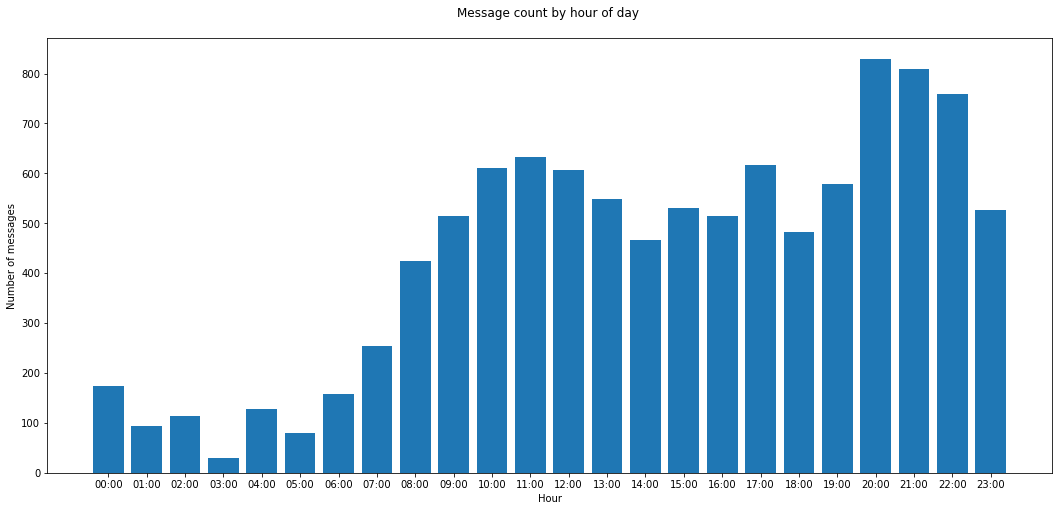

In [82]:
# Visualise data
hours = [hour for hour in chats['hour']]
rcParams['figure.figsize'] = 18, 8

plt.bar(hours, chats['chat_count']) 
plt.ticklabel_format(axis='y', style='plain')
plt.title("Message count by hour of day \n")
plt.ylabel('Number of messages')
plt.xlabel("Hour")
plt.xticks(hours);

In [83]:
# Group chat messages by month
chats_by_month = df_chat.groupby('month').count()['event']

m_chats = pd.DataFrame(chats_by_month)
m_chats = m_chats.reset_index()
m_chats.columns = ['month', 'chat_count']
m_chats.head()

,month,chat_count
0,April,316
1,August,1430
2,December,826
3,February,741
4,January,1505


In [84]:
# Sort m_chats dataframe in order of months since creation
months = ['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']

# Create a dummy df with the required list and the column name to sort on
dummy = pd.Series(months, name='month').to_frame()

# Use left merge on the dummy to return a sorted df
sorted_m_chats = pd.merge(dummy, m_chats, on = 'month', how = 'left')
sorted_m_chats

,month,chat_count
0,July,388
1,August,1430
2,September,1628
3,October,1738
4,November,1044
5,December,826
6,January,1505
7,February,741
8,March,761
9,April,316


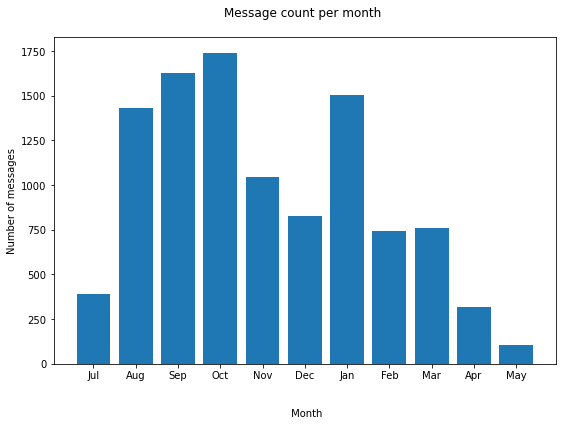

In [85]:
# Visualise data
month = [month[0:3] for month in sorted_m_chats['month']]
rcParams['figure.figsize'] = 9, 6

plt.bar(month, sorted_m_chats['chat_count']) 
plt.ticklabel_format(axis='y', style='plain')
plt.title("Message count per month \n")
plt.ylabel('Number of messages')
plt.xlabel("\n\n Month")
plt.xticks(month);

In [86]:
# group chat messages by date
chats_by_date = df_chat.groupby('date_num').count()['event']
chats_by_date

date_num
1     351
2     490
3     273
4     261
5     347
6     616
7     353
8     377
9     743
10    378
11    329
12    269
13    190
14    267
15    412
16    473
17    338
18    352
19    475
20    298
21    261
22    216
23    289
24    203
25    307
26    260
27    184
28    276
29    283
30    377
31    234
Name: event, dtype: int64